<a href="https://colab.research.google.com/github/8464947452/final-project-fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

**Introduction**
The aim of this project is to apply Machine Learning (ML) and Natural Language Processing (NLP) techniques to detect and classify fake news articles. The project investigates how well computational methods can differentiate between real and fabricated statements by analyzing linguistic and semantic cues.
It will compare traditional ML models (such as TF-IDF + Logistic Regression) against advanced transformer-based architectures (like BERT) to determine which approach provides higher accuracy and interpretability. Explainability tools (e.g., SHAP) will be used to identify key features influencing prediction outcomes, offering insights into patterns of misinformation.

**Research Questions:**
1. Can ML and NLP approaches reliably distinguish fake from real news articles across different domains?

2. Which linguistic and semantic cues most strongly indicate misinformation when analyzed using explainability methods?

3. How does model performance vary between shallow ML techniques and deep transformer models?

**Dataset Information**

**Name:** LIAR Dataset – Fake News Detection

**Source:** University of California, Santa Barbara – William Yang Wang (2017)

**Origin:** Collected from PolitiFact (2007–2016)

**Details:** Contains over 12,000 short political statements, each manually labeled for truthfulness from “pants-on-fire” to “true.”

# **Importing Files**

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# **Reading Dataset**

In [2]:
df = pd.read_csv('train.tsv', sep='\t', header=None, dtype=str)


In [3]:
print("Shape:", df.shape)

Shape: (10240, 14)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN


# **Droping unnecessary columns and labeling the columns in dataset**

In [5]:
df.columns = [
    "id", "label", "statement", "subject", "speaker", "speaker_job_title",
    "state_info", "party_affiliation", "barely_true_counts", "false_counts",
    "half_true_counts", "mostly_true_counts", "pants_on_fire_counts",
    "context"
]



# Drop unnecessary id column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [6]:
df

,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,1,1,0,"interview on ""The Colbert Report"""
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,0,1,0,an interview
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,5,3,3,a Republican presidential debate
10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,3,0,0,a televised debate on Miami's WPLG-10 against ...


# **Checking Missing Values**

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64


# **Showing Basic Information**

In [8]:
# Show basic info
print("\nTarget Variable (label) Overview:")
print(df['label'].value_counts())
print("\nUnique Labels:", df['label'].unique())


Target Variable (label) Overview:
label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Unique Labels: ['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


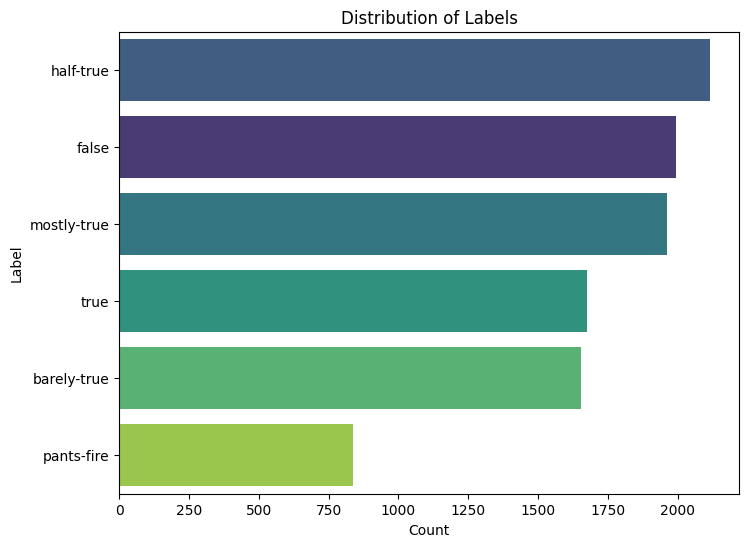

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis', hue='label', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

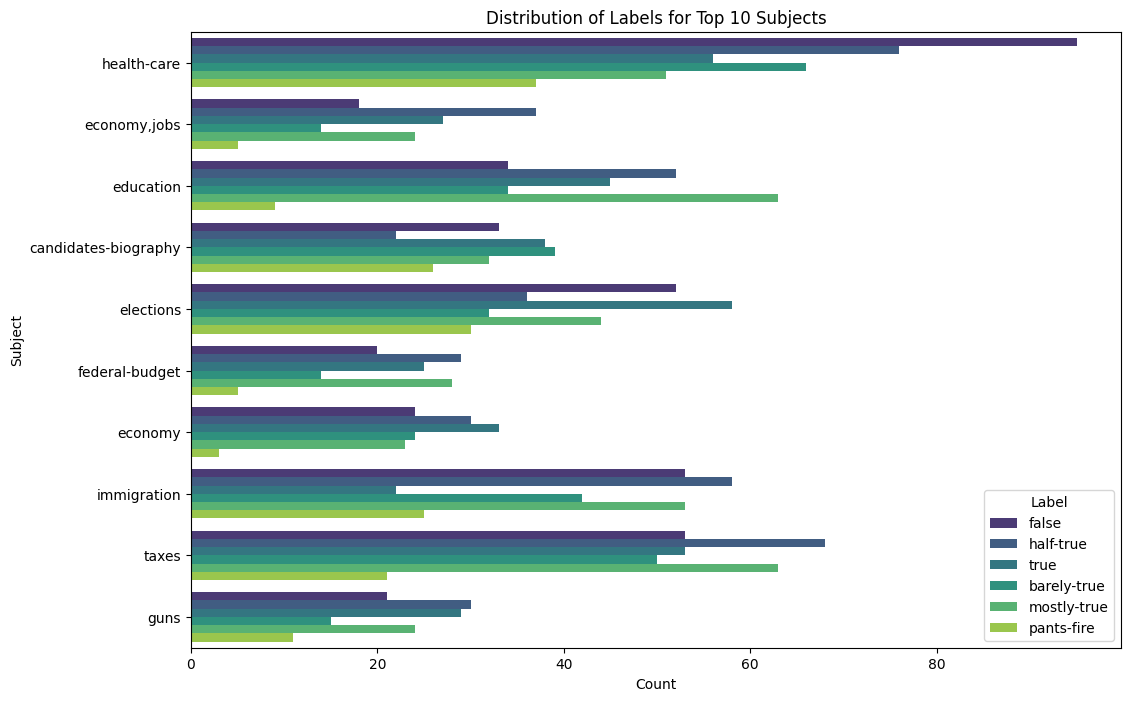

In [10]:
top_subjects = df['subject'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(data=df[df['subject'].isin(top_subjects)], y='subject', hue='label', palette='viridis')
plt.title('Distribution of Labels for Top 10 Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.legend(title='Label')
plt.show()

# **Label Encoding the dataset**

In [11]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("\nLabel Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {'barely-true': np.int64(0), 'false': np.int64(1), 'half-true': np.int64(2), 'mostly-true': np.int64(3), 'pants-fire': np.int64(4), 'true': np.int64(5)}


In [12]:
df.fillna({
    'subject':'unknown',
    'speaker':'unknown',
    'speaker_job_title':'unknown',
    'state_info':'unknown',
    'party_affiliation':'unknown',
    'context':'unknown',
    'justification':'unknown'
}, inplace=True)

num_cols = ['barely_true_counts','false_counts','half_true_counts',
            'mostly_true_counts','pants_on_fire_counts']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

In [13]:
df

,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context,label_encoded
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer,1
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.,2
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver,3
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,unknown,unknown,none,7,19,3,5,44,a news release,1
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,unknown,Florida,democrat,15,9,20,19,2,an interview on CNN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,unknown,Florida,none,0,1,1,1,0,"interview on ""The Colbert Report""",3
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,unknown,Georgia,republican,0,0,0,1,0,an interview,3
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,unknown,Georgia,republican,4,11,5,3,3,a Republican presidential debate,2
10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,unknown,Florida,democrat,3,1,3,0,0,a televised debate on Miami's WPLG-10 against ...,1


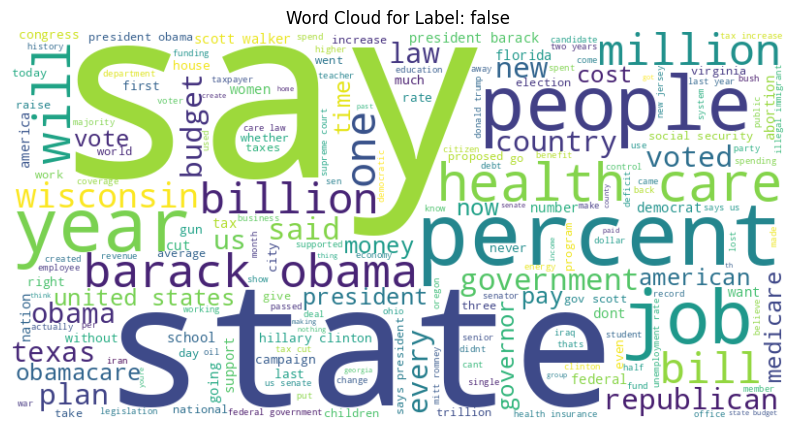

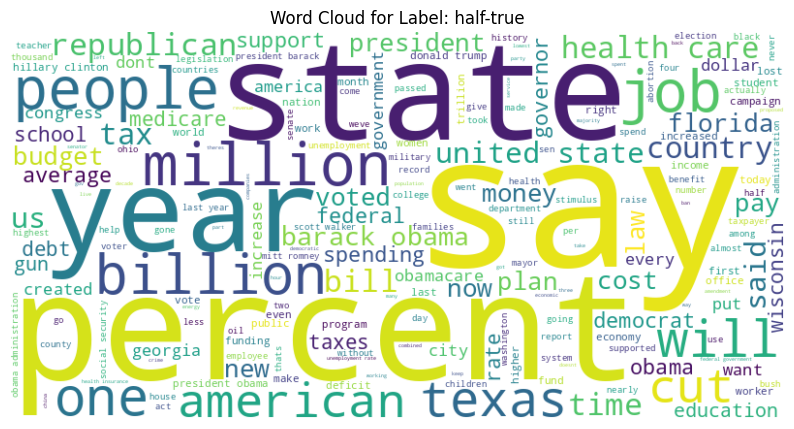

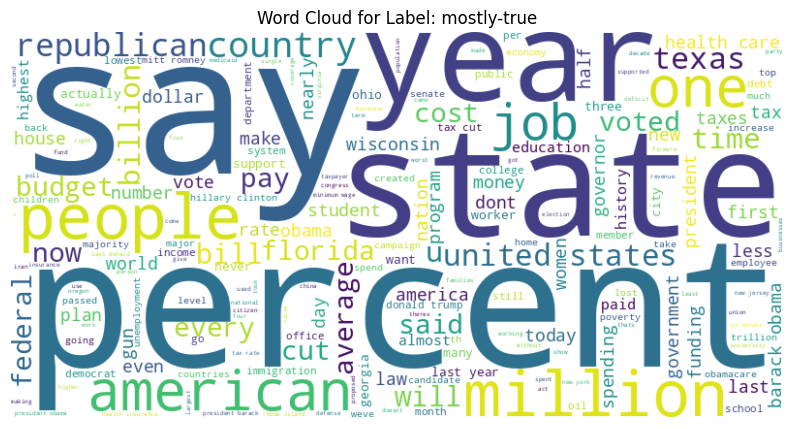

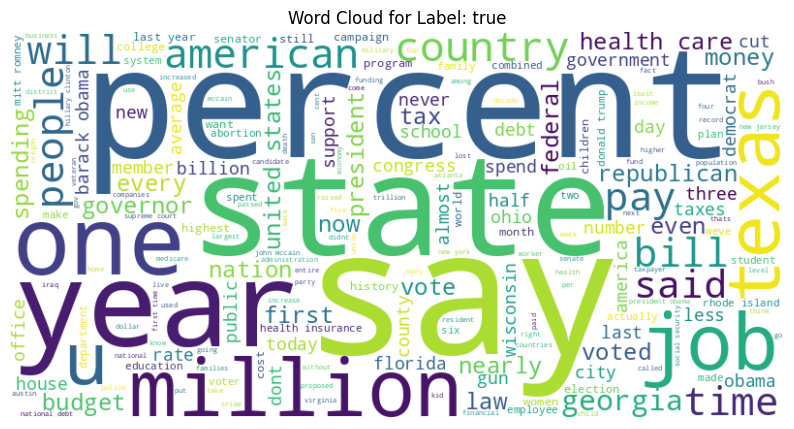

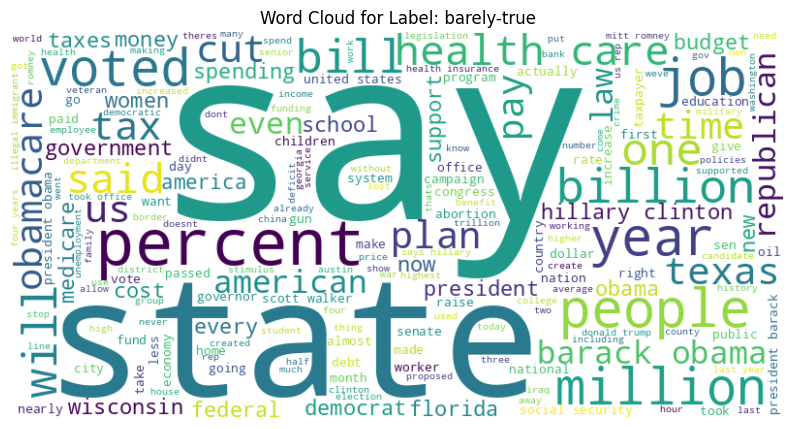

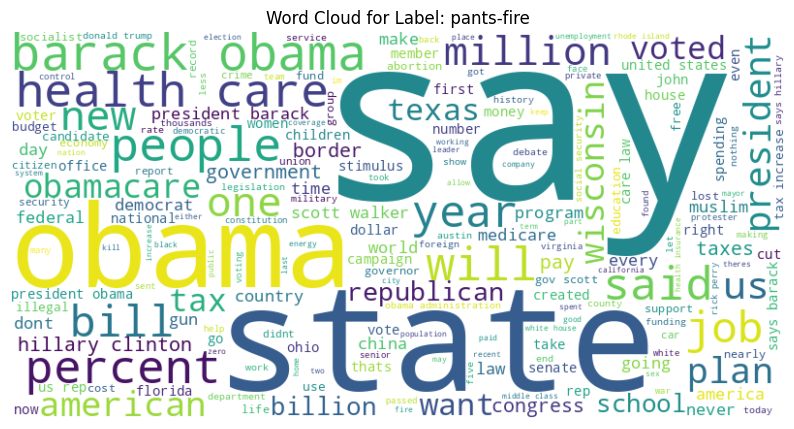

In [14]:
def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'http\S+', '', text)            # remove links
        text = re.sub(r'[^a-z\s]', '', text)           # remove punctuation/numbers
        text = re.sub(r'\s+', ' ', text).strip()       # normalize spaces
        return text
df['clean_statement'] = df['statement'].apply(clean_text)

# Word Cloud of statements for each label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_statement'].dropna())
    if text:  # Only generate word cloud if there is text for the label
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Label: {label}")
        plt.show()
    else:
        print(f"No text available for label: {label}")

# **Cleaning Dataset**

In [15]:
df.fillna({
    'subject':'unknown',
    'speaker':'unknown',
    'speaker_job_title':'unknown',
    'state_info':'unknown',
    'party_affiliation':'unknown',
    'context':'unknown',
    'justification':'unknown'
}, inplace=True)

num_cols = ['barely_true_counts','false_counts','half_true_counts',
            'mostly_true_counts','pants_on_fire_counts']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_statement'], df['label_encoded'], test_size=0.2, random_state=42)

# **Applying TF-IDF Vectorization**

In [17]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("\nTF-IDF Shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)


TF-IDF Shapes -> Train: (8192, 5000)  Test: (2048, 5000)


In [18]:
# Models, metrics, and utilities
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

RANDOM_STATE = 42
CLASS_NAMES = list(le.classes_)  # uses your existing LabelEncoder

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — without repeating logic across models."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # AUC if scores/probabilities are available
    auc = np.nan
    if hasattr(estimator, "predict_proba"):
        y_score = estimator.predict_proba(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")
    elif hasattr(estimator, "decision_function"):
        y_score = estimator.decision_function(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # Confusion matrix (normalized for readability)
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} — Normalized Confusion Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }


In [19]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000, solver="liblinear", random_state=RANDOM_STATE
    ),
    "LinearSVC": LinearSVC(
        C=1.0, random_state=RANDOM_STATE
    ),
    "SGDClassifier (log loss)": SGDClassifier(
        loss="log_loss", alpha=1e-4, random_state=RANDOM_STATE
    ),
    "MultinomialNB": MultinomialNB(),
    "ComplementNB": ComplementNB(),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=RANDOM_STATE
    ),
}


In [20]:
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — robust to models without predict_proba."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # Robust ROC-AUC (multiclass OvR): try predict_proba; else softmax(decision_function); else NaN
    auc = np.nan
    try:
        if hasattr(estimator, "predict_proba"):
            y_score = estimator.predict_proba(Xte)
            auc = roc_auc_score(yte, y_score, multi_class="ovr")
        elif hasattr(estimator, "decision_function"):
            raw = estimator.decision_function(Xte)
            # Ensure 2D for binary edge-cases; then softmax to get pseudo-probabilities
            if raw.ndim == 1:
                raw = np.vstack([-raw, raw]).T
            y_score = softmax(raw, axis=1)
            auc = roc_auc_score(yte, y_score, multi_class="ovr")
    except Exception as e:
        # If any issue arises (e.g., degenerate classes), we skip AUC gracefully
        auc = np.nan

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # Confusion matrix (normalized)
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} — Normalized Confusion Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }



LogisticRegression
------------------
Accuracy: 0.2358 | Macro-F1: 0.2075 | Weighted-F1: 0.2259 | ROC-AUC (OvR): 0.5895

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1959    0.1416    0.1644       339
       false     0.2365    0.3167    0.2708       401
   half-true     0.2385    0.3082    0.2689       438
 mostly-true     0.2325    0.2775    0.2530       382
  pants-fire     0.3333    0.0405    0.0723       148
        true     0.2699    0.1794    0.2155       340

    accuracy                         0.2358      2048
   macro avg     0.2511    0.2107    0.2075      2048
weighted avg     0.2420    0.2358    0.2259      2048



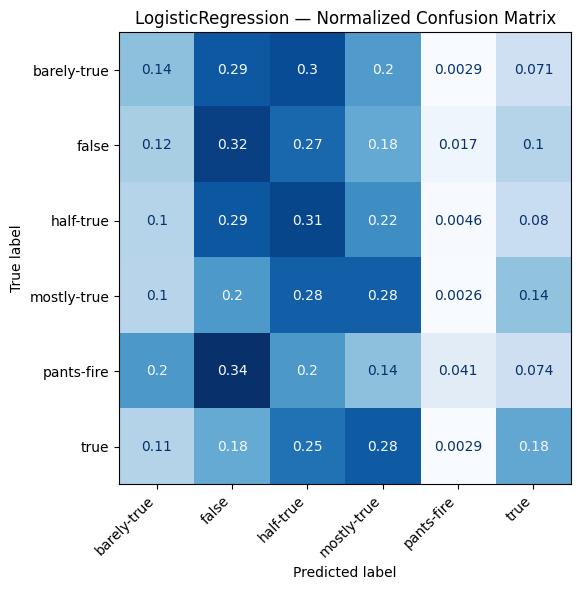


LinearSVC
---------
Accuracy: 0.2256 | Macro-F1: 0.2175 | Weighted-F1: 0.2240 | ROC-AUC (OvR): 0.5648

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1895    0.1711    0.1798       339
       false     0.2459    0.2643    0.2548       401
   half-true     0.2267    0.2557    0.2403       438
 mostly-true     0.2339    0.2565    0.2447       382
  pants-fire     0.1967    0.1622    0.1778       148
        true     0.2319    0.1882    0.2078       340

    accuracy                         0.2256      2048
   macro avg     0.2208    0.2163    0.2175      2048
weighted avg     0.2244    0.2256    0.2240      2048



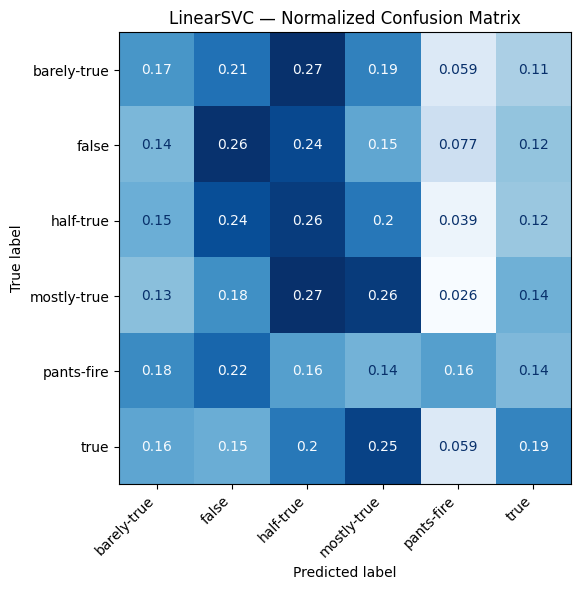


SGDClassifier (log loss)
------------------------
Accuracy: 0.2383 | Macro-F1: 0.2124 | Weighted-F1: 0.2293 | ROC-AUC (OvR): 0.5877

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1917    0.1357    0.1589       339
       false     0.2371    0.2968    0.2636       401
   half-true     0.2423    0.3242    0.2773       438
 mostly-true     0.2358    0.2827    0.2571       382
  pants-fire     0.3077    0.0541    0.0920       148
        true     0.2754    0.1912    0.2257       340

    accuracy                         0.2383      2048
   macro avg     0.2483    0.2141    0.2124      2048
weighted avg     0.2419    0.2383    0.2293      2048



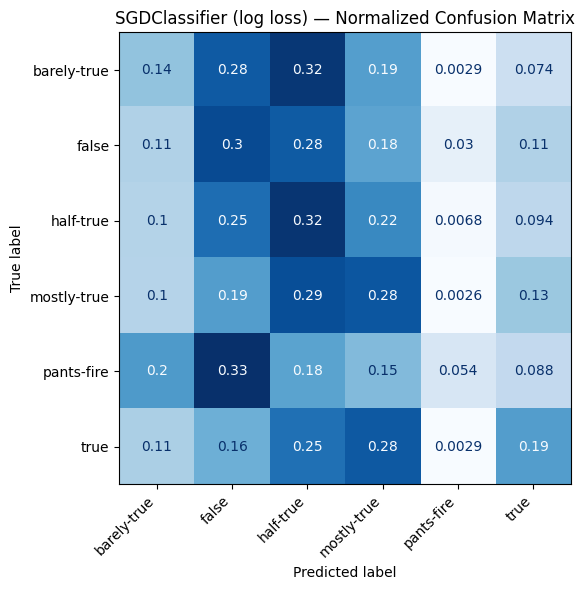


MultinomialNB
-------------
Accuracy: 0.2466 | Macro-F1: 0.2021 | Weighted-F1: 0.2246 | ROC-AUC (OvR): 0.5830

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2279    0.0914    0.1305       339
       false     0.2432    0.3142    0.2742       401
   half-true     0.2379    0.4247    0.3049       438
 mostly-true     0.2421    0.3010    0.2684       382
  pants-fire     0.8000    0.0270    0.0523       148
        true     0.3258    0.1265    0.1822       340

    accuracy                         0.2466      2048
   macro avg     0.3461    0.2141    0.2021      2048
weighted avg     0.2933    0.2466    0.2246      2048



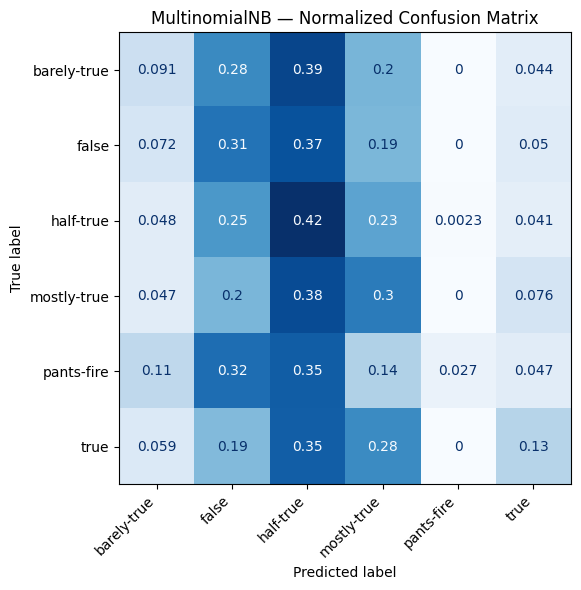


ComplementNB
------------
Accuracy: 0.2246 | Macro-F1: 0.2202 | Weighted-F1: 0.2250 | ROC-AUC (OvR): 0.5741

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1882    0.1976    0.1928       339
       false     0.2172    0.2020    0.2093       401
   half-true     0.2438    0.2489    0.2463       438
 mostly-true     0.2417    0.2487    0.2452       382
  pants-fire     0.1695    0.2027    0.1846       148
        true     0.2583    0.2294    0.2430       340

    accuracy                         0.2246      2048
   macro avg     0.2198    0.2215    0.2202      2048
weighted avg     0.2260    0.2246    0.2250      2048



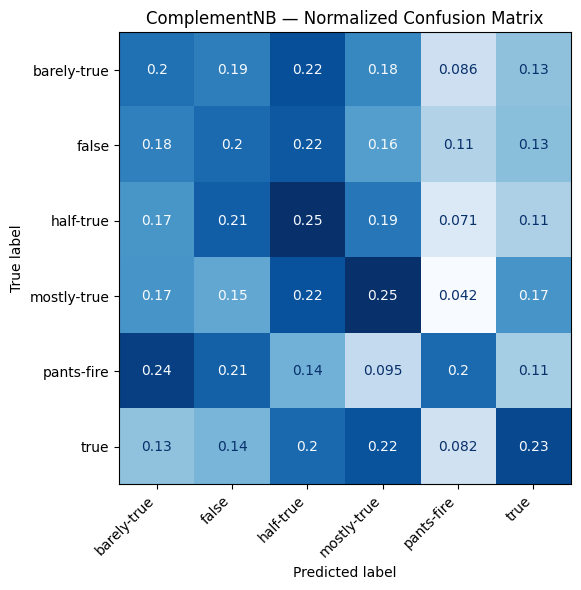


RandomForest
------------
Accuracy: 0.2515 | Macro-F1: 0.2322 | Weighted-F1: 0.2424 | ROC-AUC (OvR): 0.5952

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2261    0.1327    0.1673       339
       false     0.2521    0.3666    0.2988       401
   half-true     0.2596    0.2922    0.2750       438
 mostly-true     0.2542    0.3168    0.2821       382
  pants-fire     0.3333    0.1216    0.1782       148
        true     0.2305    0.1647    0.1921       340

    accuracy                         0.2515      2048
   macro avg     0.2593    0.2324    0.2322      2048
weighted avg     0.2521    0.2515    0.2424      2048



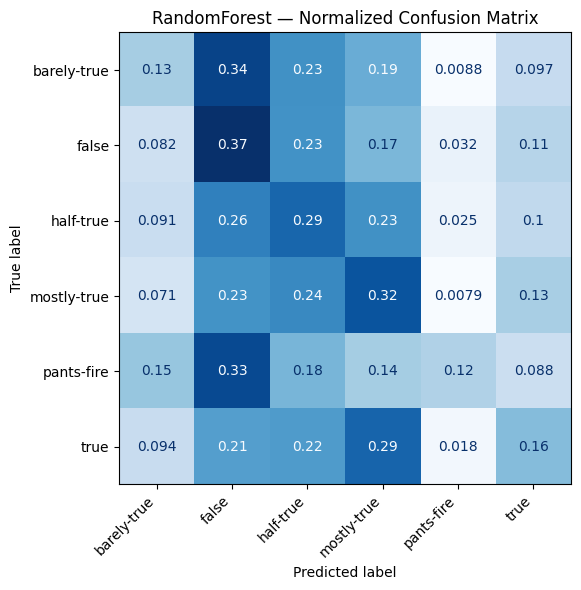


GradientBoosting
----------------
Accuracy: 0.2251 | Macro-F1: 0.1849 | Weighted-F1: 0.2005 | ROC-AUC (OvR): 0.5482

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1961    0.0885    0.1220       339
       false     0.2386    0.1696    0.1983       401
   half-true     0.2195    0.5251    0.3096       438
 mostly-true     0.2486    0.2304    0.2391       382
  pants-fire     0.1786    0.0676    0.0980       148
        true     0.2303    0.1029    0.1423       340

    accuracy                         0.2251      2048
   macro avg     0.2186    0.1973    0.1849      2048
weighted avg     0.2236    0.2251    0.2005      2048



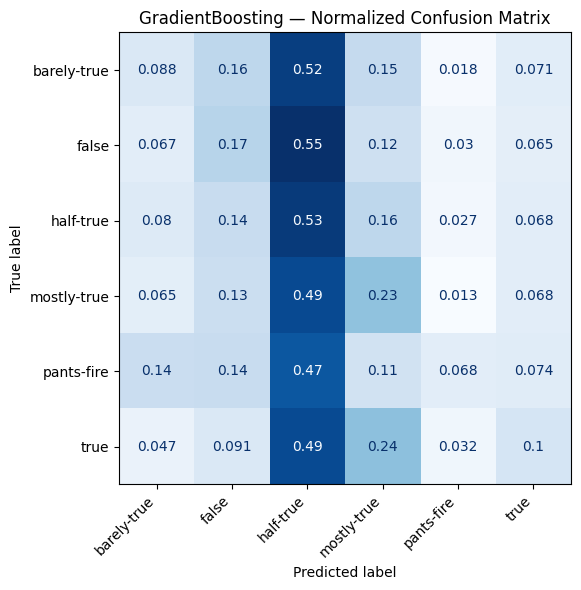


Model leaderboard (sorted by Macro-F1):

              model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
            RandomForest  0.251465  0.232236     0.242381     0.595195
            ComplementNB  0.224609  0.220201     0.224988     0.574139
               LinearSVC  0.225586  0.217543     0.224048     0.564766
SGDClassifier (log loss)  0.238281  0.212433     0.229300     0.587663
      LogisticRegression  0.235840  0.207486     0.225940     0.589463
           MultinomialNB  0.246582  0.202087     0.224594     0.582997
        GradientBoosting  0.225098  0.184867     0.200516     0.548214


In [21]:
import pandas as pd

results, trained = [], {}

for name, est in models.items():
    out = evaluate_model(est, name)
    results.append({k: v for k, v in out.items() if k != "estimator"})
    trained[name] = out["estimator"]

results_df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard (sorted by Macro-F1):\n")
print(results_df[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))
